In [17]:
# Import libraries
import numpy as np
from scipy.ndimage import convolve
from matplotlib.colors import ListedColormap
from matplotlib.colors import BoundaryNorm
import matplotlib.pyplot as plt

## Explanation

Below is the code for the initial set up proposed in the document we were given on Monday. 
We should look to define the code below in two seperate functions for clarity that can then be used to judge changes over time

In terms of improving our model here are some initial thoughts:
1) Larger range of house values with their probabilities of occurence and the values themselves decided by referenced research for a specific city/town
2) Consider the most important neighbourhood properties and either incorporate them into our equations or define new equations
3) change size of neighbourhood but also weighting of neighbourhood (the immediate neighbours should have a more significant impact than neighbours further away)
4) Perhaps we could add some changes in income over time to match the development of salaries?
5) Find a way to model the fact that people leave and enter new cities all the time. Have a proportion of people leave the city and enter the city at each timestep.

In [18]:
# Create matrices to keep track of house prices and corresponding house owners

# Define lattice size
n = 10
m = 10

# Create lattice of house prices
house_values = [100, 500, 1000] # Adjust accordingly
house_probabilities = [0.5, 0.3, 0.2] # Adjust accordingly
V = np.random.choice(house_values, size = (n,m), p = house_probabilities)


# Create lattice of house owners
# Poor = 0.1
# Middle = 0.5
# Rich = 1
income_values = [0.1,0.5,1.0]
income_probabilities = [0.5, 0.3, 0.2]
A = np.random.choice(income_values, size = (n,m), p = income_probabilities)

print("House Prices (V):\n", V)
print("\nIncome Levels (A):\n", A)

House Prices (V):
 [[ 100  100  100 1000  100  500  100  100  500  500]
 [ 100  100  100  500  100 1000  500  500  100  100]
 [1000  100  100  100  100  500  100  500  100  500]
 [ 500  500  100  500  100  100  100  500  500  500]
 [ 500  500  500  100  500 1000  500  500  100  100]
 [ 100  500  500 1000  100  100  100 1000  100  100]
 [ 100  500  100  100  500  100  500  100  500  100]
 [ 100  500  100  500 1000  500  100  100  100 1000]
 [ 100  100  100  100  500  500  500  500  500 1000]
 [ 100 1000  100  100  100  100 1000  100 1000  100]]

Income Levels (A):
 [[0.1 0.1 0.1 0.5 1.  0.1 0.1 0.5 0.1 1. ]
 [0.1 1.  0.1 0.1 0.5 1.  0.1 1.  0.1 0.5]
 [1.  0.1 1.  0.5 1.  0.5 1.  0.1 0.5 0.5]
 [0.1 0.1 0.1 0.5 0.1 0.5 0.1 0.1 0.5 1. ]
 [0.5 1.  0.5 0.1 1.  0.1 1.  0.5 0.1 1. ]
 [1.  0.1 0.5 0.1 1.  0.1 1.  0.5 0.5 0.1]
 [1.  1.  0.1 0.5 1.  1.  0.1 0.1 1.  1. ]
 [0.1 1.  0.1 1.  0.1 0.5 0.1 0.1 0.1 0.1]
 [1.  0.5 0.1 0.5 0.1 0.5 0.1 1.  0.1 0.1]
 [0.1 1.  0.5 0.5 0.1 0.5 0.1 1.  0.1 0.5]

In [19]:
# Update house values

old_V = V.copy()
z = 1 # coefficient value (change as necessary)

# Define Neighbourhood area size
neighbourhood = np.ones((5,5))

# Computes sum of neighbourhood house values and number of neighbours using convolution
# constant mode with cval = 0 treats anything outside of edges of matrix as zero
# Search up convolve function to understand this part
neighbourhood_sum = convolve(old_V, neighbourhood, mode='constant', cval = 0)
neighbourhood_count = convolve(np.ones((n,m)), neighbourhood, mode='constant', cval = 0)

# Use equation given in worksheet to calculate new values of houses
V = np.round(A + z * (neighbourhood_sum / neighbourhood_count))

print("Sum of Neighbourhood House Values:\n", neighbourhood_sum) 
print("Number of Neighbours:\n", neighbourhood_count)
print("Updated House Prices:\n", V)

Sum of Neighbourhood House Values:
 [[ 1800  3400  3700  4500  4900  5700  4800  5600  3600  2900]
 [ 2900  5000  5400  5800  5800  7000  6100  7300  5200  4400]
 [ 4400  6600  7500  8400  8400  9600  8700  9500  6400  5100]
 [ 5200  7400  8300  8800  8400 10100  8800  9200  6500  5200]
 [ 5600  7400  8700  8300  7500  8800  8300  8300  6500  5200]
 [ 5100  7300  9500 10000  8800  9700  8800  8400  6600  5300]
 [ 4300  6100  8700 10000  9600 10500 10000  9700  7500  5800]
 [ 4000  5800  8000  8800  8400  9300  9700  9800  8500  6300]
 [ 2900  3700  5800  6600  6600  7000  8300  8400  7200  5100]
 [ 2200  2900  4500  5300  5300  5700  6600  7100  6000  4400]]
Number of Neighbours:
 [[ 9. 12. 15. 15. 15. 15. 15. 15. 12.  9.]
 [12. 16. 20. 20. 20. 20. 20. 20. 16. 12.]
 [15. 20. 25. 25. 25. 25. 25. 25. 20. 15.]
 [15. 20. 25. 25. 25. 25. 25. 25. 20. 15.]
 [15. 20. 25. 25. 25. 25. 25. 25. 20. 15.]
 [15. 20. 25. 25. 25. 25. 25. 25. 20. 15.]
 [15. 20. 25. 25. 25. 25. 25. 25. 20. 15.]
 [15. 20.

In [20]:
# Propose a move

# Flattened choice using numpy
total_grid_cells = n * m

# Randomly selects a number between 0 and the total number of grid cells
flat_indices = np.random.choice(total_grid_cells, size=2, replace=False)  # replace=False to ensure distinct choices
print(flat_indices)

# Translate value back into distinct gridspace 
# divmod does i1 = flat_indices // m, j1 = flat_indices % m
i1, j1 = divmod(flat_indices[0], m)
i2, j2 = divmod(flat_indices[1], m)

print("Random position 1:", (i1,j1))
print("Random position 2:", (i2,j2))

# Calculate value of Delta function given by the worksheet
d = (A[i1,j1] - V[i1,j1])**2 + (A[i2,j2] - V[i2,j2])**2 - (A[i1,j1] - V[i2,j2])**2 - (A[i2,j2] - V[i1,j1])**2 

# Swap inhabitants if delta value is positive
if d > 0:
    A[i1,j1], A[i2,j2] = A[i2,j2], A[i1,j1]

    
print("Delta Value: ", d)
print(A)


[31 37]
Random position 1: (np.int64(3), np.int64(1))
Random position 2: (np.int64(3), np.int64(7))
Delta Value:  -2.9103830456733704e-11
[[0.1 0.1 0.1 0.5 1.  0.1 0.1 0.5 0.1 1. ]
 [0.1 1.  0.1 0.1 0.5 1.  0.1 1.  0.1 0.5]
 [1.  0.1 1.  0.5 1.  0.5 1.  0.1 0.5 0.5]
 [0.1 0.1 0.1 0.5 0.1 0.5 0.1 0.1 0.5 1. ]
 [0.5 1.  0.5 0.1 1.  0.1 1.  0.5 0.1 1. ]
 [1.  0.1 0.5 0.1 1.  0.1 1.  0.5 0.5 0.1]
 [1.  1.  0.1 0.5 1.  1.  0.1 0.1 1.  1. ]
 [0.1 1.  0.1 1.  0.1 0.5 0.1 0.1 0.1 0.1]
 [1.  0.5 0.1 0.5 0.1 0.5 0.1 1.  0.1 0.1]
 [0.1 1.  0.5 0.5 0.1 0.5 0.1 1.  0.1 0.5]]


In [21]:
import numpy as np

def similarity(S: np.ndarray, R: int, mode: str = "wrap") -> np.ndarray:

    n, m = S.shape
    same = np.zeros_like(S, dtype=float)
    for di in range(-R, R+1):
        for dj in range(-R, R+1):
            if di == 0 and dj == 0:
                same += 1.0  # the cell matches itself
            else:
                if mode == "wrap":
                    same += (S == np.roll(np.roll(S, di, axis=0), dj, axis=1))
                else:
                    # zero-padded edges: build a shifted view safely
                    tmp = np.full_like(S, fill_value=-1)  # -1 won't match any category
                    i_from = max(0, di); i_to = min(n, n+di)
                    j_from = max(0, dj); j_to = min(m, m+dj)
                    oi_from = max(0, -di); oi_to = min(n, n-di)
                    oj_from = max(0, -dj); oj_to = min(m, m-dj)
                    tmp[oi_from:oi_to, oj_from:oj_to] = S[i_from:i_to, j_from:j_to]
                    same += (S == tmp)
    denom = (2*R + 1)**2 if mode == "wrap" else np.maximum(1.0,  # avoid divide-by-zero
             np.zeros_like(S, float) + (2*R + 1)**2)  # (you can compute exact varying denom if needed)
    return same / denom


### Schelling Segregation Model

Schelling model allows for:

- Agent may have preferences regarding price alligning to income, culture or political similiarity to neighbours which effect where they live

- It builds a similiarity threshold which effects behavior. Ie) a higher threshold, there is stronger segregation and more allignment between neighbours

The metrics which are relevant are similarity_ratio, mean_like_neighbour_fraction, dissimilarity_index, as here I am quantifing segregation, but it can be changed against other factors.

Parameters: empty_ratio, similarity threshold, number of iterations and whats considered a neighbour. I use Moore which means that each house has 8 neighbours but Von Neumann has 4 so potenital extension.




- affordability = absolute difference $| \text{price} - \text{income}|$.
- Utility is a weighted score combining cultural similarity and affordability:
  $$
  U_{i} = w_{\text{sim}}\cdot {\text{fraction of similar neighbours}}
          \;-\; w_{\text{aff}}\cdot {\frac{|p_{cell(i)} - y_i|}{S}}
  $$
  where \(S\) is a scaling factor (default: price range) so the two terms are both considered.
- Two cultural groups: \(-1\) and \(+1\) (empty cells are \(0\)).
- Neighbourhood: Moore (8 neighbours).

Move rule: if $(U_i < \tau)$ (utility threshold), the agent is unsatisfied and moves to a random empty cell.
This mirrors classic Schelling (threshold-based moves), but with an economic penalty added.

References:

- https://medium.com/data-science/schellings-model-of-racial-segregation-4852fad06c13
- https://github.com/b3rnoulli/schelling-segregation-model/blob/master/Schelling.m 
- https://github.com/projectmesa/mesa-schelling-example/blob/master/model.py

In [22]:
from dataclasses import dataclass
from typing import List, Optional
import numpy as np

try:
    del SchellingParams
except NameError:
    pass
    
@dataclass
class SchellingParams:
    width: int = 50
    height: int = 50
    empty_ratio: float = 0.12
    similarity_weight: float = 1.0
    affordability_weight: float = 1.0
    utility_threshold: float = 0.0
    n_iterations: int = 250
    income_low: float = 80.0
    income_high: float = 120.0
    seed: int = 123
    
class SchellingModel:
    def __init__(self, p: SchellingParams, price_grid: Optional[np.ndarray] = None):
        self.p = p
        self.rng = np.random.default_rng(p.seed)
        H, W = p.height, p.width

        n_cells = H * W
        n_empty = int(round(p.empty_ratio * n_cells))
        n_agents = n_cells - n_empty
        half = n_agents // 2
        agents = np.array([-1]*half + [1]*(n_agents - half) + [0]*n_empty, dtype=int)
        self.rng.shuffle(agents)
        self.agent_grid = agents.reshape(H, W)


        if price_grid is None:
            x = np.linspace(-1, 1, W)
            y = np.linspace(-1, 1, H)
            X, Y = np.meshgrid(x, y)
            base = 100 + 10*X + 5*Y  
            noise = self.rng.normal(0, 2.0, size=(H, W))
            self.price_grid = base + noise
        else:
            #assert price_grid.shape == (H, W),
            assert price_grid.shape == (H, W)
            self.price_grid = price_grid.astype(float)

        incomes = self.rng.uniform(p.income_low, p.income_high, size=n_agents)
        # pack incomes into a grid aligned with agent cells (-1/+1), 0 for empty
        self.income_grid = np.zeros((H, W), dtype=float)
        idx_agents = np.argwhere(self.agent_grid != 0)
        self.rng.shuffle(idx_agents)
        for k, (i, j) in enumerate(idx_agents):
            if k >= incomes.size: break
            self.income_grid[i, j] = incomes[k]

        self.scale = max(1e-9, float(self.price_grid.max() - self.price_grid.min()))

        self.history_agents: List[np.ndarray] = [self.agent_grid.copy()]
        self.history_utility: List[np.ndarray] = []
        self.moves_per_iter: List[int] = []

    @staticmethod
    def neighbours_moore(arr: np.ndarray, i: int, j: int) -> np.ndarray:
        H, W = arr.shape
        i0, i1 = max(0, i-1), min(H-1, i+1)
        j0, j1 = max(0, j-1), min(W-1, j+1)
        block = arr[i0:i1+1, j0:j1+1]
        out = block.flatten()
        # remove center
        idx_center = (i - i0) * (j1 - j0 + 1) + (j - j0)
        return np.delete(out, idx_center)

    def frac_similar(self, i: int, j: int) -> float:
        a = self.agent_grid[i, j]
        if a == 0: 
            return 0.0
        neigh = self.neighbours_moore(self.agent_grid, i, j)
        neigh = neigh[neigh != 0]
        if neigh.size == 0:
            return 0.0
        return float(np.count_nonzero(neigh == a) / neigh.size)

    def affordability_penalty(self, i: int, j: int) -> float:
        price = self.price_grid[i, j]
        income = self.income_grid[i, j]
        if self.agent_grid[i, j] == 0:
            return 0.0
        return abs(price - income) / self.scale

    def utility(self, i: int, j: int) -> float:
        if self.agent_grid[i, j] == 0:
            return 0.0
        sim = self.frac_similar(i, j)
        pen = self.affordability_penalty(i, j)
        return self.p.similarity_weight * sim - self.p.affordability_weight * pen

    def step(self) -> int:
        H, W = self.agent_grid.shape
        empties = list(zip(*np.where(self.agent_grid == 0)))
        coords = list(zip(*np.where(self.agent_grid != 0)))
        self.rng.shuffle(coords)
        moves = 0

        # precompute utility threshold
        tau = self.p.utility_threshold

        for i, j in coords:
            u = self.utility(i, j)
            if u < tau and len(empties) > 0:
                # Move to a random empty cell
                k = self.rng.integers(len(empties))
                ei, ej = empties.pop(k)

                # Transfer agent and its income to the new cell
                self.agent_grid[ei, ej] = self.agent_grid[i, j]
                self.income_grid[ei, ej] = self.income_grid[i, j]

                # Vacate old
                self.agent_grid[i, j] = 0
                self.income_grid[i, j] = 0.0

                # Old cell becomes a new empty
                empties.append((i, j))
                moves += 1

        self.moves_per_iter.append(moves)
        # store utility snapshot (optional, can be large)
        U = np.zeros_like(self.price_grid, dtype=float)
        for i in range(H):
            for j in range(W):
                if self.agent_grid[i, j] != 0:
                    U[i, j] = self.utility(i, j)
        self.history_utility.append(U)
        self.history_agents.append(self.agent_grid.copy())
        return moves

    def run(self) -> int:
        for it in range(self.p.n_iterations):
            m = self.step()
            if m == 0:
                return it + 1
        return self.p.n_iterations

    def summary(self) -> dict:
        H, W = self.agent_grid.shape
        sims = []
        pens = []
        utils = []
        for i in range(H):
            for j in range(W):
                if self.agent_grid[i, j] == 0:
                    continue
                sims.append(self.frac_similar(i, j))
                pen = self.affordability_penalty(i, j)
                pens.append(pen)
                utils.append(self.utility(i, j))
        return {
            "avg_similarity": float(np.mean(sims)) if sims else 0.0,
            "avg_afford_penalty": float(np.mean(pens)) if pens else 0.0,
            "avg_utility": float(np.mean(utils)) if utils else 0.0,
            "moves_last_iter": self.moves_per_iter[-1] if self.moves_per_iter else 0,
        }


In [23]:
p = SchellingParams(
    width=50, height=50, empty_ratio=0.12,
    similarity_weight=1.0, affordability_weight=1.0,
    utility_threshold=0.0,
    n_iterations=250,
    income_low=85.0, income_high=115.0,
    seed=2025
) 

schelling = SchellingModel(p, price_grid=None)
iters = schelling.run()
summary = schelling.summary()
print("Iterations run:", iters)
print("Average similarity:", round(summary["avg_similarity"], 3))
print("Average affordability penalty:", round(summary["avg_afford_penalty"], 3))
print("Avgrage utility:", round(summary["avg_utility"], 3))
print("Moves in last iter:", summary["moves_last_iter"])

Iterations run: 11
Average similarity: 0.645
Average affordability penalty: 0.22
Avgrage utility: 0.424
Moves in last iter: 0


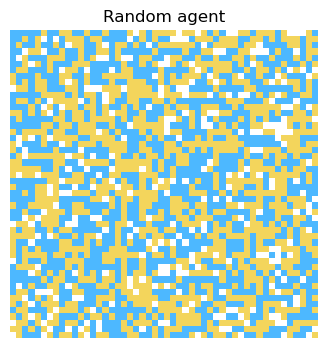

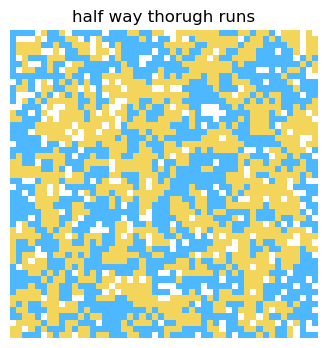

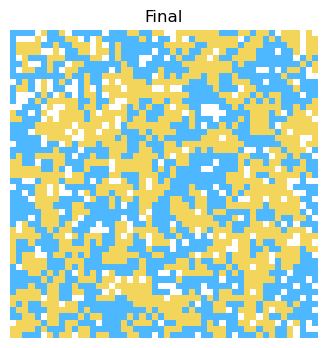

In [24]:
#testign making sure the groups get closer over time
def plot_agents(grid, title="Agents"):
    arr = grid.copy()
    cmap = ListedColormap(["#4db8ff", "#ffffff", "#f3d55c"])
    bounds = [-1.5, -0.5, 0.5, 1.5] 
    norm = BoundaryNorm(bounds, cmap.N)
   
    plt.figure(figsize=(5,4))
    plt.imshow(arr, cmap=cmap, interpolation="nearest")
    plt.title(title)
    plt.axis("off")
    plt.show()

plot_agents(schelling.history_agents[0], "Random agent")
mid = schelling.history_agents[len(schelling.history_agents)//2]
plot_agents(mid, "half way thorugh runs")
plot_agents(schelling.history_agents[-1], "Final")


House Prices (V):
 [[ 100  100  100  500  500  100 1000  100  500  100]
 [1000  500  100  500  500  100  500  500  500  100]
 [ 100  100  100  100 1000  100  100  100  100  100]
 [ 100  100  100 1000  500  100  500  100  100  500]
 [1000  100 1000  500  500  100  100  100  100 1000]
 [ 100  100  500  100  100  500  100 1000  500  100]
 [1000  500  100  100  500 1000  100  100 1000  100]
 [ 100  100 1000  500  500  100  500  500 1000  100]
 [ 100  100  100  500 1000  100  100  500 1000  100]
 [ 100  100  500  100  100 1000  500  100 1000 1000]]

Income Levels (A):
 [[0.1 1.  0.5 0.1 0.5 0.1 0.5 0.5 0.1 0.1]
 [0.1 0.1 0.5 1.  1.  0.5 0.1 1.  1.  0.5]
 [0.1 0.1 0.5 0.1 0.1 0.5 0.1 0.1 1.  0.5]
 [1.  0.1 0.1 0.5 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.5 0.1 0.1 0.1 0.1 1.  1.  0.5]
 [0.5 0.5 0.1 0.1 0.1 0.1 0.1 0.1 0.1 1. ]
 [1.  0.5 0.1 0.5 0.1 0.1 0.1 0.1 1.  0.1]
 [0.1 0.1 0.1 0.1 0.1 0.5 0.1 0.5 1.  0.1]
 [0.1 1.  0.1 0.1 0.5 0.1 0.1 0.5 0.1 0.1]
 [0.5 0.1 1.  0.1 0.1 1.  0.1 0.1 1.  0.1]

MovieWriter stderr:
[out#0/gif @ 0x55fd42e0f180] Error writing trailer: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '600x600', '-pix_fmt', 'rgba', '-framerate', '20', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'housing_sim.gif']' returned non-zero exit status 234.

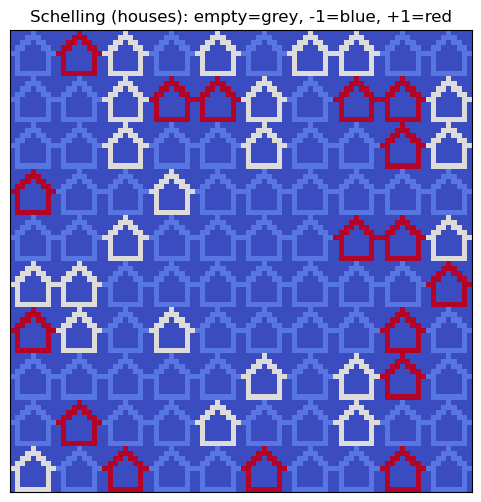

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
import matplotlib.animation as animation
from matplotlib import colors

# Create matrices to keep track of house prices and corresponding house owners

# Define lattice size
n = 10
m = 10

empty_ratio = 0.12 # define empties

rng = np.random.default_rng(2025)
mask_empty=rng.random((n,m))<empty_ratio
C = rng.choice([-1, 1], size=(n, m), p=[0.5, 0.5]).astype(int ) #2 culture groups -1 and +1 and 0 on empties
C[mask_empty] = 0

A = A.astype(float) #make empty houses have no income
A[mask_empty] = 0.0


# Define house for display
house = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
                         [0, 0, 0, 1, 1, 1, 0, 0, 0],
                         [0, 0, 1, 1, 0, 1, 1, 0, 0],
                         [0, 1, 1, 0, 0, 0, 1, 1, 0],
                         [1, 1, 0, 0, 0, 0, 0, 1, 1],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 1, 1, 1, 1, 1, 1, 1, 0]])
house_size = house.shape[0]  # square matrix

# Create lattice of house prices
house_values = [100, 500, 1000] # Adjust accordingly
house_probabilities = [0.5, 0.3, 0.2] # Adjust accordingly
V = np.random.choice(house_values, size = (n,m), p = house_probabilities)

S = float(V.max() - V.min()) if (V.max() > V.min()) else 1.0 
w_sim = 1.0
w_aff = 1.0

# Create lattice of house owners
# Poor = 0.1
# Middle = 0.5
# Rich = 1
income_values = [0.1,0.5,1.0]
income_probabilities = [0.5, 0.3, 0.2]
A = np.random.choice(income_values, size = (n,m), p = income_probabilities)

print("House Prices (V):\n", V)
print("\nIncome Levels (A):\n", A)

# Update house values

#old_V = V.copy()
#z = 1 # coefficient value (change as necessary)

# Define Neighbourhood area size
#neighbourhood = np.ones((5,5))

# Computes sum of neighbourhood house values and number of neighbours using convolution
# constant mode with cval = 0 treats anything outside of edges of matrix as zero
# Search up convolve function to understand this part
#neighbourhood_sum = convolve(old_V, neighbourhood, mode='constant', cval = 0)
#neighbourhood_count = convolve(np.ones((n,m)), neighbourhood, mode='constant', cval = 0)

# Use equation given in worksheet to calculate new values of houses
#V = np.round(A + z * (neighbourhood_sum / neighbourhood_count))

print("Sum of Neighbourhood House Values:\n", neighbourhood_sum) 
print("Number of Neighbours:\n", neighbourhood_count)
#print("Updated House Prices:\n", new_V)

def neighbours_moore(arr, i, j):
    H, W = arr.shape
    i0, i1 = max(0, i-1), min(H-1, i+1)
    j0, j1 = max(0, j-1), min(W-1, j+1)
    block = arr[i0:i1+1, j0:j1+1].flatten()
    # remove center
    idx_center = (i - i0) * (j1 - j0 + 1) + (j - j0)
    return np.delete(block, idx_center)

def frac_similar(C, i, j):
    if C[i, j] == 0:
        return 0.0
    neigh = neighbours_moore(C, i, j)
    neigh = neigh[neigh != 0]
    if neigh.size == 0:
        return 0.0
    return float(np.count_nonzero(neigh == C[i, j]) / neigh.size)

def affordability_penalty(V, A, i, j, S):
    if A[i, j] == 0:   # empty cell
        return 0.0
    return abs(V[i, j] - A[i, j]) / S

def utility_at(C, V, A, i, j, w_sim, w_aff, S):
    return w_sim * frac_similar(C, i, j) - w_aff * affordability_penalty(V, A, i, j, S)

def local_utility_sum(C, V, A, i, j, w_sim, w_aff, S):
    H, W = C.shape
    total = 0.0
    for ii in range(max(0, i-1), min(H-1, i+1)+1):
        for jj in range(max(0, j-1), min(W-1, j+1)+1):
            total += utility_at(C, V, A, ii, jj, w_sim, w_aff, S)
    return total


# def propose_move(A):
    # Propose a move

    #should_swap = False
    # Flattened choice using numpy
    total_grid_cells = n * m

    # Randomly selects a number between 0 and the total number of grid cells
    #flat_indices = np.random.choice(total_grid_cells, size=2, replace=False)  # replace=False to ensure distinct choices
    #print(flat_indices)

    # Translate value back into distinct gridspace 
    # divmod does i1 = flat_indices // m, j1 = flat_indices % m
   # i1, j1 = divmod(flat_indices[0], m)
    #i2, j2 = divmod(flat_indices[1], m)

    #print("Random position 1:", (i1,j1))
    #print("Random position 2:", (i2,j2))

    # Calculate value of Delta function given by the worksheet
    #d = (A[i1,j1] - V[i1,j1])**2 + (A[i2,j2] - V[i2,j2])**2 - (A[i1,j1] - V[i2,j2])**2 - (A[i2,j2] - V[i1,j1])**2 


    #should_swap = bool(d > 0)

    #return should_swap, [i1, j1, i2, j2], d
    
#def find_swap(A):
    
    #rejected_pairs = []
    #rejected_deltas = []

    #swap_bool, pair, d = propose_move(A)
    #while not swap_bool:
        #rejected_pairs.append(pair)
        #rejected_deltas.append(d)
        #swap_bool, pair, d = propose_move(A)
    
    #return pair, d, rejected_pairs, rejected_deltas
    
def propose_move(A):
    # Propose a move
    total_grid_cells = n*m
    tries = 0 
    while True:
        i1, j1 = divmod(np.random.randint(total_grid_cells), m)
        i2, j2 = divmod(np.random.randint(total_grid_cells), m)
        if (i1, j1) != (i2, j2) and (A[i1, j1] > 0) and (A[i2, j2] > 0):
            break
        tries +=1
        if tries > 1000:  # fallback: allow any
            break
    #local utility before anything
    u_before = local_utility_sum(C, V, A, i1, j1, w_sim, w_aff, S) + \
               local_utility_sum(C, V, A, i2, j2, w_sim, w_aff, S)
    #potential swap
    A[i1, j1], A[i2, j2] = A[i2, j2], A[i1, j1]
    C[i1, j1], C[i2, j2] = C[i2, j2], C[i1, j1]
    #local utility after
    u_after = local_utility_sum(C, V, A, i1, j1, w_sim, w_aff, S) + \
              local_utility_sum(C, V, A, i2, j2, w_sim, w_aff, S)  
    #should swp occur??
    dU = u_after - u_before
    if dU >= 0:
        return True, [i1, j1, i2, j2], float(dU)
    #revert back if there is a rejection
    A[i1, j1], A[i2, j2] = A[i2, j2], A[i1, j1]
    C[i1, j1], C[i2, j2] = C[i2, j2], C[i1, j1]
    return False, [i1, j1, i2, j2], float(dU)
    
def perform_swap(A_mat, pair):

    i1, j1, i2, j2 = pair
    # swap income
    A_mat[i1, j1], A_mat[i2, j2] = A_mat[i2, j2], A_mat[i1, j1]
    #swap culture
    C[i1, j1], C[i2, j2] = C[i2, j2], C[i1, j1]
    return A_mat
    
    print("Random position 1 to swap:", (i1,j1))
    print("Random position 2 to swap:", (i2,j2))
    A_mat[i1,j1], A_mat[i2,j2] = A_mat[i2,j2], A_mat[i1,j1]

    return A_mat

def get_display_A(A):
    display_A = np.zeros((house.shape[0]*A.shape[0], house.shape[1]*A.shape[1]))
    for row in range(0, n):
        for col in range(0, m):
            display_A[row*house_size:(row+1)*house_size, col*house_size:(col+1)*house_size] = A[row, col] * house

    return display_A

def culture_to_intensity(grid):
    vals = np.zeros_like(grid, dtype=float)
    vals[grid == -1] = 0.25
    vals[grid ==  1] = 0.90
    vals[grid ==  0] = 0.00
    return vals

### MAIN

## Custom colour map with legend and no axis numbers
#cmap = colors.ListedColormap(['#222222', "#f3d55c", '#4db8ff', '#ff5c5c'])  # change to whatever
#bounds=np.concatenate(([0,0.02], np.array(income_values)+0.01), axis=0)
#norm = colors.BoundaryNorm(bounds, cmap.N)

## Create plot
#fig = plt.figure()
#im=plt.imshow(A, cmap=cmap, norm=norm)

#legend_ticks = [(bounds[i+1]+bounds[i])/2 for i in range(0,len(bounds)-1)]
#cbar = plt.colorbar(im, cmap=cmap, norm=norm, boundaries=bounds, ticks=legend_ticks)
#cbar.ax.set_yticklabels(['Background', 'Poor', 'Middle', 'Rich'])
#plt.xticks([])
#plt.yticks([])

fig = plt.figure(figsize=(6,6))
im = plt.imshow(
    get_display_A(culture_to_intensity(C)),
    cmap="coolwarm", vmin=0, vmax=1, interpolation="nearest"
)
plt.title("Schelling (houses): empty=grey, -1=blue, +1=red")
plt.xticks([]); plt.yticks([])


def init():
    display_A = get_display_A(A)
    im.set_data(display_A)
    return [im]

def animate(i):
    global A, C
    moved, pair, dU= propose_move(A,C)
    im.set_array(get_display_A(culture_to_intensity(C)))
    return [im]

nSeconds = 20
fps = 20
anim = animation.FuncAnimation(
                               fig, 
                               animate, 
                               init_func=init,
                               frames = nSeconds * fps,
                               interval = 100 / fps, # in ms
                               blit = True,
                               repeat=False
                               )

anim.save('housing_sim.gif', fps=fps)

print("Finished and saved animation.")